In [2]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import model_selection

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn import datasets

In [3]:
from keras.datasets import mnist

from keras.models import Sequential, load_model, save_model

from keras.layers import Dense, Dropout, Flatten

from keras.layers.convolutional import Conv2D, MaxPooling2D

from keras.utils.np_utils import to_categorical

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
### attention au chemin!!!!

df=pd.read_csv('/content/drive/MyDrive/Python/Brief_detection_de_la_langue_des_signes/sign_mnist_train.csv')

In [48]:
df.shape

(27455, 785)

In [49]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [50]:
#Le dataset est bien équilibré (mais il manque les lettres Y et Z) :

df.label.value_counts()

17    1294
16    1279
11    1241
22    1225
5     1204
18    1199
14    1196
3     1196
19    1186
23    1164
8     1162
20    1161
13    1151
2     1144
0     1126
24    1118
10    1114
6     1090
15    1088
21    1082
12    1055
7     1013
1     1010
4      957
Name: label, dtype: int64

In [51]:
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print(labels)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [52]:
# On convertit les lignes de pixels en matrices (images) :

n_samples = len(df.index)
images = np.array(df.drop(['label'],axis=1))
images = images.reshape(n_samples,28,28)

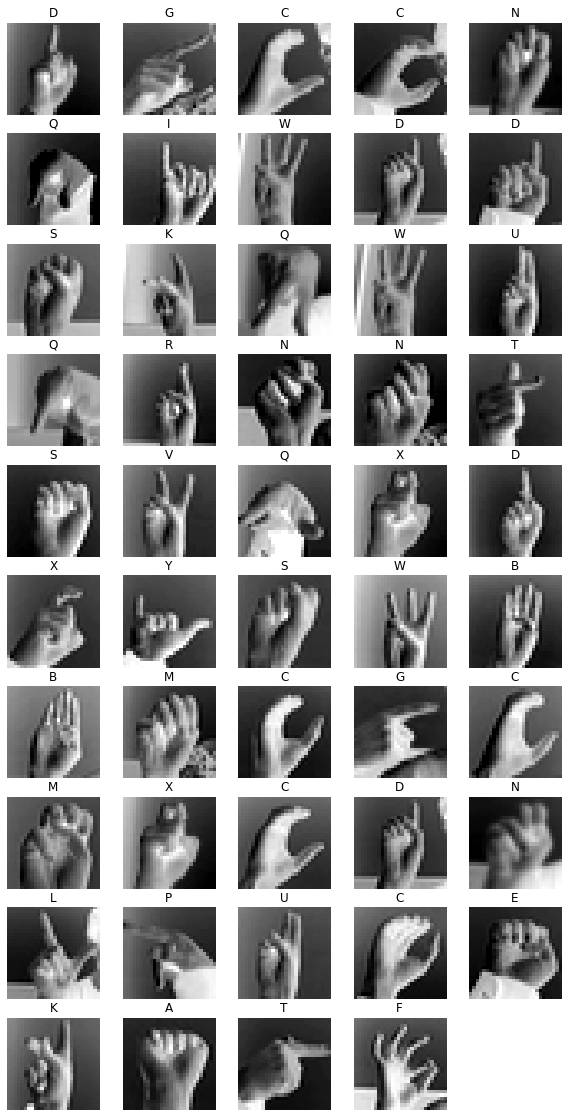

In [53]:
# affichage des 50 premiers

plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(images[i], cmap="gray_r")
    plt.title(labels[df.label[i]])

In [54]:
# séparation des cibles et des features

y = df['label']
X = df.drop(['label'] , axis=1)

In [55]:
X.shape

(27455, 784)

In [56]:
#normalisation des valeurs entre 0 et 1

X = X/255

In [57]:
#séparation en jeu de test et jeu d'entrainement

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [58]:
# initiation du réseau dense MLPClassifier
# j'utilise la méthode MLPClassifier de sklearn pour utiliser un réseau de neurones à deux couches cachées de 200 et 60 neurones :

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(200,60))
mlp.fit(X_train,y_train)
y_mlp = mlp.predict(X_test)

In [60]:
y_mlp[0]

2

In [61]:
#mlp score

mlp_score = accuracy_score(y_test, y_mlp)
print(mlp_score)

0.9998178838098707


In [85]:
#on sauvegarde le model
import pickle

# save the model to disk
filename = 'detection_langue_des_signes1.sav'
pickle.dump(mlp, open(filename, 'wb'))

In [63]:
#matrice de confusion

pd.crosstab(y_test, y_mlp, rownames=['Reel'], colnames=['Prediction'], margins=True)

Prediction,0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,All
Reel,,,,,,,,,,,,,,,,,,,,,,,,,
0,223,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,223
1,0,176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,176
2,0,0,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,250
3,0,0,0,229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,229
4,0,0,0,0,178,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,178
5,0,0,0,0,0,249,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,249
6,0,0,0,0,0,0,205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,205
7,0,0,0,0,0,0,0,195,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,195
8,1,0,0,0,0,0,0,0,215,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,216


Réseaux denses (Keras/Tensorflow)

In [64]:
# Comme l'activation d'un neurone donne une valeur (probabilité) entre 0 ou 1,
# on code la cible (classes entre 0 et 24) sous la forme d'un vecteur de 0 ou 1 (one hot encoding) avec to_categorical


from keras.utils.np_utils import to_categorical

In [65]:
print(y[0])
y_cat = to_categorical(y)
print(y_cat[0])

3
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [66]:
# On a seulement 25 classes (il manque les Y et Z dans le dataset)

num_classes = y_cat.shape[1]
print(num_classes)

25


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, random_state=1)

In [68]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [69]:
from keras.models import Sequential
from keras.layers import Dense

In [70]:
model = Sequential()  # modèle séquentiel == des couches de neurones qui se suivent
model.add(Dense(200, activation='relu'))  # les neurones denses == neurones simples vus dans le cours
model.add(Dense(60, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [71]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
train = model.fit(X_train , y_train , validation_data=(X_test,y_test), epochs=30, verbose=1)

Epoch 1/30
687/687 [==============================] - 2s 3ms/step - loss: 2.6959 - accuracy: 0.1963 - val_loss: 1.5856 - val_accuracy: 0.4649
Epoch 2/30
687/687 [==============================] - 2s 3ms/step - loss: 1.4445 - accuracy: 0.5415 - val_loss: 1.0600 - val_accuracy: 0.6691
Epoch 3/30
687/687 [==============================] - 2s 3ms/step - loss: 1.0274 - accuracy: 0.6711 - val_loss: 0.7517 - val_accuracy: 0.7798
Epoch 4/30
687/687 [==============================] - 2s 3ms/step - loss: 0.7482 - accuracy: 0.7676 - val_loss: 0.6376 - val_accuracy: 0.7975
Epoch 5/30
687/687 [==============================] - 2s 3ms/step - loss: 0.5815 - accuracy: 0.8171 - val_loss: 0.4826 - val_accuracy: 0.8339
Epoch 6/30
687/687 [==============================] - 2s 3ms/step - loss: 0.4297 - accuracy: 0.8666 - val_loss: 0.4009 - val_accuracy: 0.8589
Epoch 7/30
687/687 [==============================] - 2s 3ms/step - loss: 0.3375 - accuracy: 0.8959 - val_loss: 0.4753 - val_accuracy: 0.8392
Epoch 

In [84]:
model.save('/content/drive/MyDrive/Python/Brief_detection_de_la_langue_des_signes/model_detection_langue_des_signes/detection_langue_des_signes2.h5')

In [74]:
model.evaluate(X_test,y_test)

172/172 [==============================] - 0s 2ms/step - loss: 0.0109 - accuracy: 0.9980


[0.010850812308490276, 0.9979967474937439]

In [75]:
print(train.history['accuracy'])

[0.3249408006668091, 0.5775359869003296, 0.698779821395874, 0.7806865572929382, 0.8351848721504211, 0.8746585249900818, 0.9047987461090088, 0.926971435546875, 0.9447277188301086, 0.9554725885391235, 0.968903660774231, 0.9731378555297852, 0.9710435271263123, 0.9836095571517944, 0.9867055416107178, 0.9809688329696655, 0.979238748550415, 0.9974048733711243, 0.9836095571517944, 0.9779183864593506, 0.9823802709579468, 0.9997268319129944, 0.9744582176208496, 0.999681293964386, 0.9744582176208496, 0.9995446801185608, 0.9999089241027832, 0.9619377255439758, 0.9991349577903748, 0.9801493287086487]


In [76]:
print(train.history['val_accuracy'])

[0.4649426341056824, 0.6690948605537415, 0.779821515083313, 0.7974867820739746, 0.8339100480079651, 0.8588599562644958, 0.8391913771629333, 0.9429976344108582, 0.9393553137779236, 0.9373520016670227, 0.985977053642273, 0.9845201373100281, 0.9138590693473816, 0.9865233898162842, 0.9899836182594299, 0.9983609318733215, 0.9996357560157776, 0.9837916493415833, 0.9996357560157776, 1.0, 0.9996357560157776, 0.9998179078102112, 1.0, 1.0, 0.9998179078102112, 0.9958113431930542, 0.9998179078102112, 0.9938080310821533, 1.0, 0.9979967474937439]


In [77]:
#fonction pour afficher un graphique des scores

def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

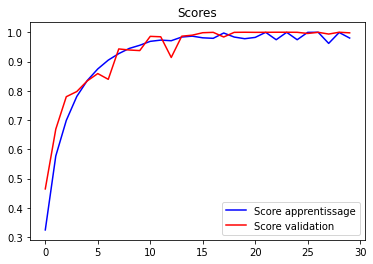

In [78]:
plot_scores(train)